# It's Nir Bahadur Raya. It's March 09, 2023.
Today I am practising from 'Explore and analyze data with Python' training of microsoft learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image #I am saving and displaying images instead of using plt.show() to display the figures in my notebook 
                        #on GitHub as well

In [2]:
student_data=pd.read_csv('student_data.csv')
student_data.head()

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0


In [3]:
student_data.tail()

,Name,StudyHours,Grade
19,Skye,12.0,52.0
20,Daniel,12.5,63.0
21,Aisha,12.0,64.0
22,Bill,8.0,NaN
23,Ted,NaN,NaN


In [4]:
student_data.shape

(24, 3)

In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        24 non-null     object 
 1   StudyHours  23 non-null     float64
 2   Grade       22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [6]:
#checking for NaN values
student_data.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [7]:
#filling the missing study hours
student_data.StudyHours = student_data.StudyHours.fillna(student_data.StudyHours.mean())
student_data

,Name,StudyHours,Grade
0,Dan,10.000000,50.0
1,Joann,11.500000,50.0
2,Pedro,9.000000,47.0
3,Rosie,16.000000,97.0
4,Ethan,9.250000,49.0
5,Vicky,1.000000,3.0
6,Frederic,11.500000,53.0
7,Jimmie,9.000000,42.0
8,Rhonda,8.500000,26.0
9,Giovanni,14.500000,74.0


In [8]:
student_data.dropna(inplace=True)
student_data.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

In [9]:
student_data.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [10]:
#adding a column named 'Pass' by assuming 60 as the pass mark
student_data['Pass'] = (student_data['Grade'] >= 60)
student_data.head()

,Name,StudyHours,Grade,Pass
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False


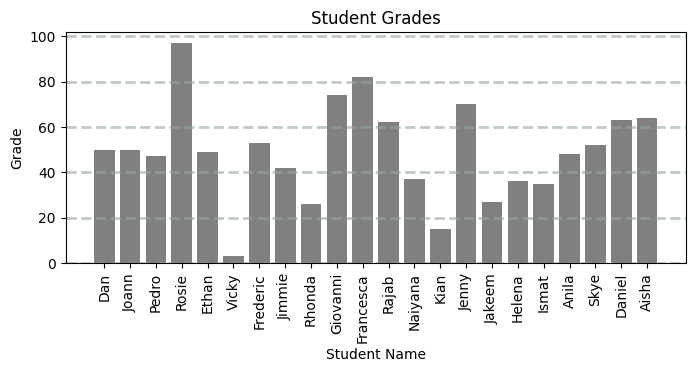

In [11]:
# Creating a Figure
fig = plt.figure(figsize=(8,3))

#Creating a bar plot of name vs grade
plt.bar(x=student_data.Name, height=student_data.Grade, color='grey')

# Customizing the chart
plt.title('Student Grades')
plt.xlabel('Student Name')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.6)
plt.xticks(rotation=90)

# Saving the figure
fig.savefig('student_grades.jpg')

# Opening and displaying the image
image = Image.open('student_grades.jpg')
image.show()

C:\Users\wwwra\AppData\Local\Temp\ipykernel_13108\1541727645.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(student_data.Name, rotation=90)


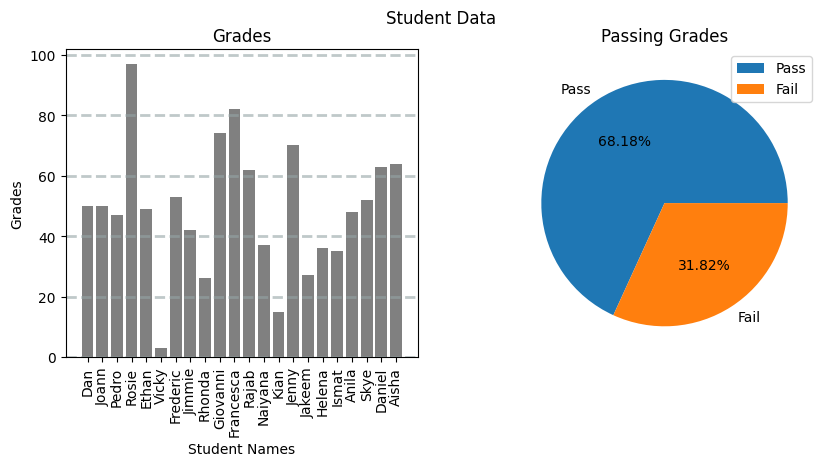

In [12]:
# creating a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# creating a bar plot of name vs grade on the first axis
ax[0].bar(x=student_data.Name, height=student_data.Grade, color='grey')
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.6)
ax[0].set_title('Grades')
ax[0].set_xticklabels(student_data.Name, rotation=90)
# set x-axis and y-axis labels 
ax[0].set_xlabel('Student Names')
ax[0].set_ylabel('Grades')


# creating a pie chart of pass counts on the second axis
pass_counts = student_data['Pass'].value_counts()
ax[1].pie(pass_counts, labels=["Pass","Fail"],startangle=0,autopct='%1.2f%%')
ax[1].set_title('Passing Grades')
ax[1].legend(["Pass","Fail"])

# Add a title to the Figure
fig.suptitle('Student Data')

# Saving the figure
fig.savefig('student_grades1.jpg')

# Opening and displaying the image
image = Image.open('student_grades1.jpg')
image.show()

A box plot is a graphical representation of a dataset that displays important statistical information about the distribution of the data. It consists of a box and whiskers that show the minimum, maximum, median, and quartiles of the data.

The box itself represents the second and third quartiles of the data, also known as the interquartile range (IQR), which contains 50% of the data. The line inside the box represents the median of the data, or the middle value when the data is ordered from lowest to highest.

The whiskers extend from the box and represent the range of the data outside the IQR. The length of the whiskers is typically 1.5 times the IQR, or the maximum value within that range, whichever is shorter. Any data points outside of the whiskers are considered outliers and are plotted as individual points.

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



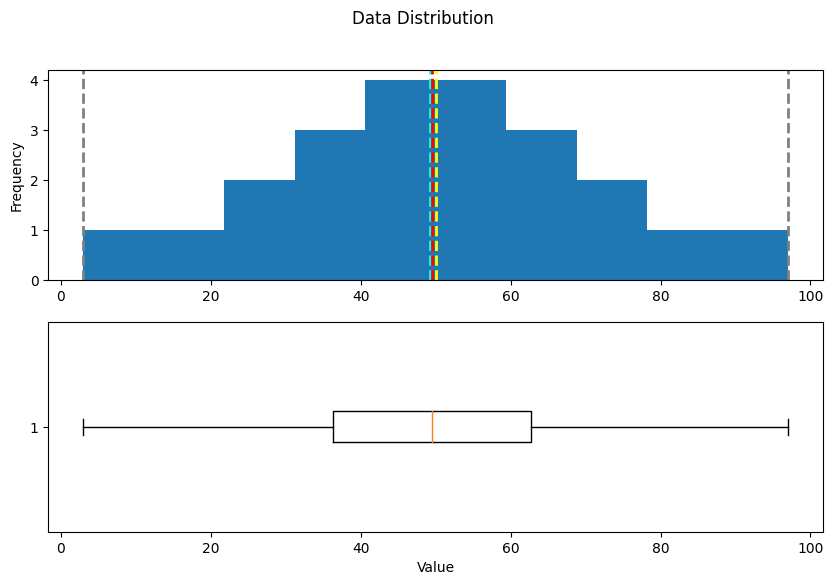

In [13]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0] #[0] is used to access the first element of the resulting pandas series that 
                                #contains the mode value(s). If there is only one mode, this will simply return the mode value. 
                                #If there are multiple modes, this will return the first mode value in the series.

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data,vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Saving the figure
    fig.savefig('student_grades2.jpg')

    # Opening and displaying the image
    image = Image.open('student_grades2.jpg')
    image.show()

# Get the variable to examine
col = student_data['Grade']
# Call the function
show_distribution(col)

Data density refers to the distribution of data points in a given dataset, specifically how closely they are packed together in a range of values. A high data density means that there are many data points in a narrow range of values, while a low data density means that there are fewer data points spread over a wider range of values.

The curve in the density plot is defined based on the estimated probability density function (PDF) of the data. The PDF represents the probability distribution of the data over the range of values, and the density plot shows this distribution as a continuous curve.

The density plot is created by first dividing the range of values into small intervals (called bins), and then estimating the PDF by calculating the number of data points falling into each bin and dividing by the total number of data points. This gives an estimate of the probability density for each bin.

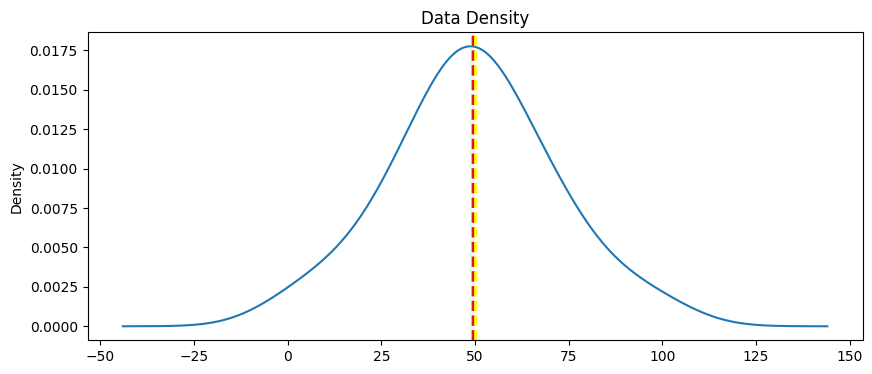

In [14]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Saving the figure
    fig.savefig('student_grades3.jpg')

    # Opening and displaying the image
    image = Image.open('student_grades3.jpg')
    image.show()

# Get the density of Grade
col = student_data['Grade']
show_density(col)